In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-dd07179edee0>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


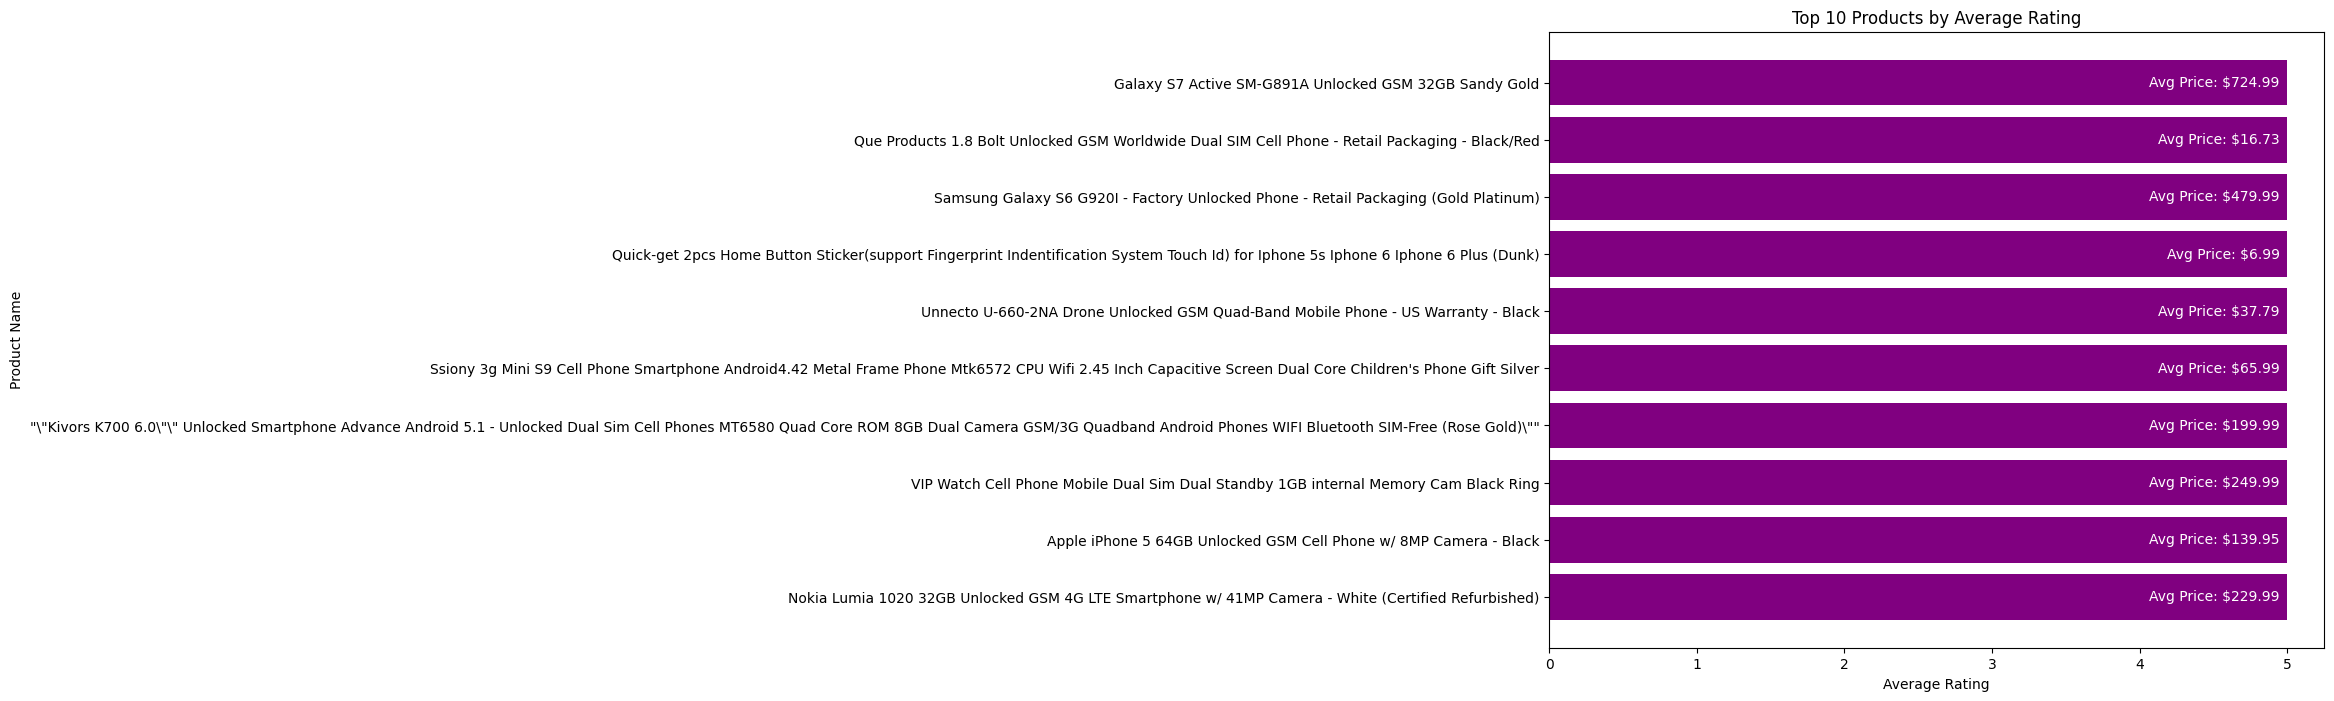

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/amazon_processed_output.csv")

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Rating' column to numeric, ignoring errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter out non-numeric and invalid ratings
valid_ratings = [1, 2, 3, 4, 5]
high_rated_df = df[df['Rating'].isin(valid_ratings)]

# Filter for price range
price_range_df = high_rated_df[(high_rated_df['Price'] >= 1)]

# Group by product and calculate average price, rating, and count of reviews
grouped_df = price_range_df.groupby('Product Name').agg({'Price': 'mean', 'Rating': ['mean', 'count']}).reset_index()
grouped_df.columns = ['ProductName', 'AvgPrice', 'AvgRating', 'ReviewCount']

# Sort by rating and get the top 10 products
top_products = grouped_df.sort_values(by='AvgRating', ascending=False).head(10)

# Create a horizontal bar chart using matplotlib
plt.figure(figsize=(10, 8))

bars = plt.barh(
    top_products['ProductName'],  # y-axis labels
    top_products['AvgRating'],    # bar lengths
    color='purple'                # bar color
)

plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Average Rating')

# Annotate with average price inside the bars
for bar, price in zip(bars, top_products['AvgPrice']):
    plt.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height()/2, f'Avg Price: ${price}', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()


<ipython-input-3-0dda6cc74002>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


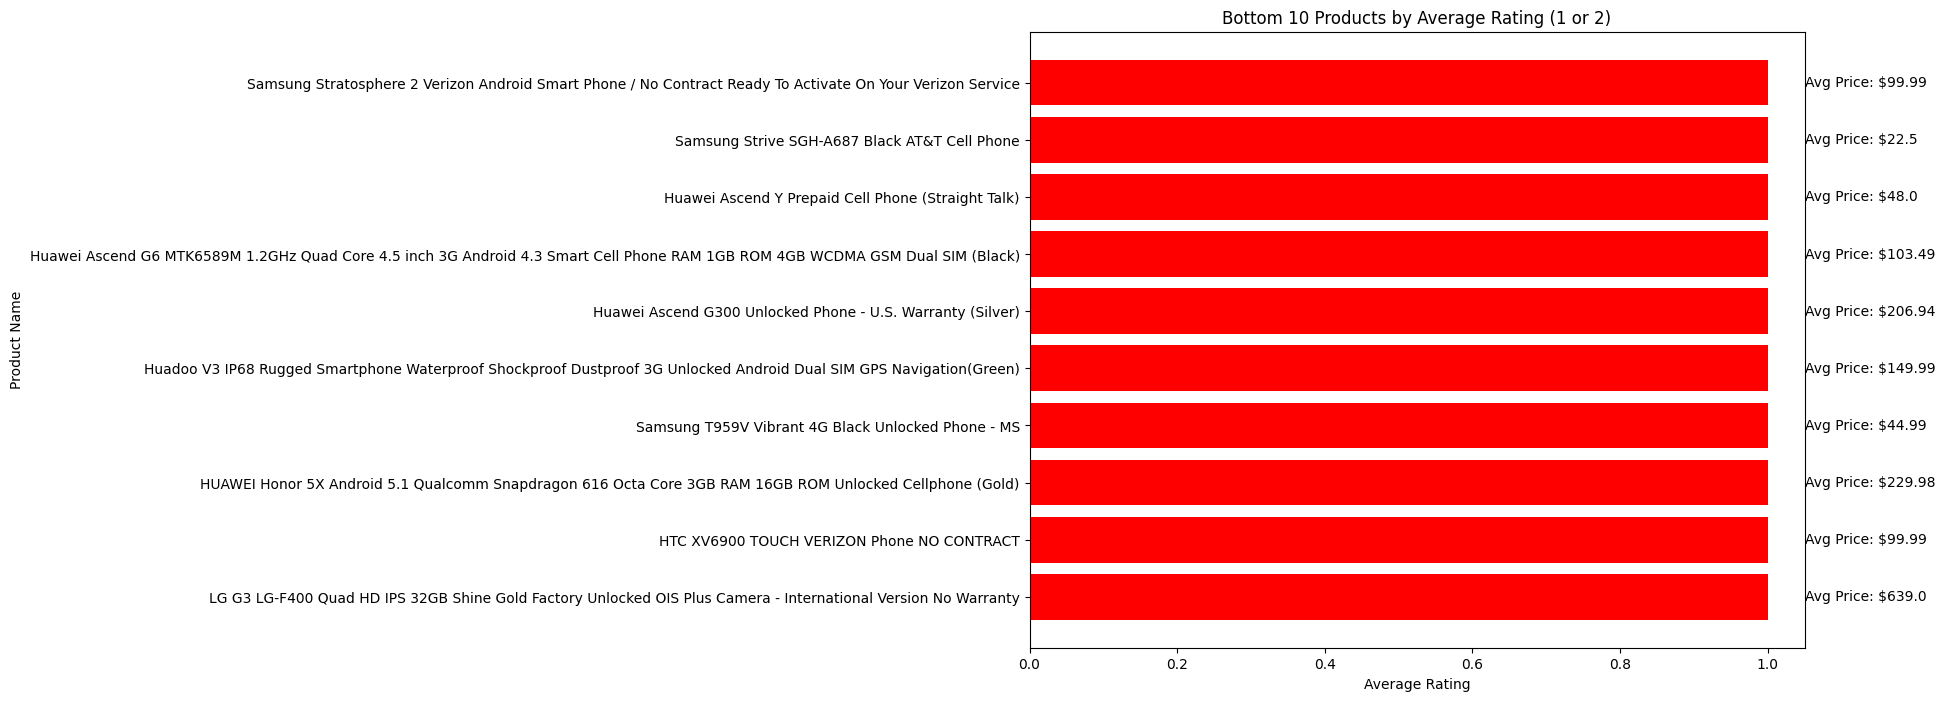

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/amazon_processed_output.csv")

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Rating' column to numeric, ignoring errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter out non-numeric and only include ratings of 1 or 2
valid_ratings = [1, 2]
low_rated_df = df[df['Rating'].isin(valid_ratings)]

# Filter for price range (>= 1 in this case, you can adjust this filter as needed)
price_range_df = low_rated_df[(low_rated_df['Price'] >= 1)]

# Group by product and calculate average price, rating, and count of reviews
grouped_df = price_range_df.groupby('Product Name').agg({'Price': 'mean', 'Rating': ['mean', 'count']}).reset_index()
grouped_df.columns = ['ProductName', 'AvgPrice', 'AvgRating', 'ReviewCount']

# Sort by rating and get the bottom 10 products
bottom_products = grouped_df.sort_values(by='AvgRating', ascending=True).head(10)

# Create a horizontal bar chart using matplotlib
plt.figure(figsize=(10, 8))

bars = plt.barh(
    bottom_products['ProductName'],  # y-axis labels
    bottom_products['AvgRating'],    # bar lengths
    color='red'                      # bar color
)

plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Bottom 10 Products by Average Rating (1 or 2)')

# Annotate with average price inside the bars
for bar, price in zip(bars, bottom_products['AvgPrice']):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'Avg Price: ${price}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()
